In [63]:
import os
import cv2
import numpy as np
import random
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
from PIL import Image

In [94]:
path_test = "E:\\HerbalLens\\"
CATEGORIES = ["arali","ashoka","brahmi","aloevera","indiangooseberry", "giloy", "bamboo", "beans","betel", "bhringaraj", "camphor", "caricature","castor","catharanthus","chakte","chilli","coffee","coriander","curryleaf","drumstick","ekka","eucalyptus","ganigale","ganike","ginger","guava","henna","hibiscus", "jackfruit","jasmine","kamakasturi","kambajala","kepala","lemon","turmeric","tulsi"]
IMG_SIZE = 200

In [95]:
def createTrainingSet():
    for cat in CATEGORIES:
        path = os.path.join(path_test, cat)
        class_num = CATEGORIES.index(cat)
        for img in os.listdir(path):
            img_array = cv2.imread(os.path.join(path,img))
            new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
            training.append([new_array,class_num])

In [96]:
training = []
createTrainingSet()
# print(training)

random.shuffle(training)

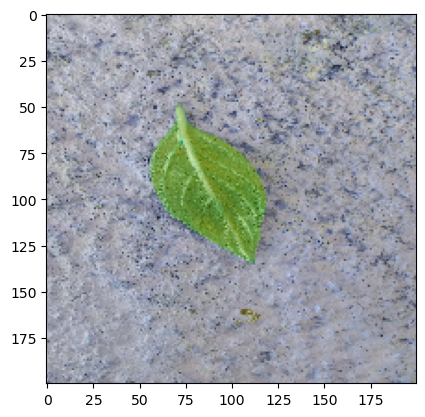

In [97]:
X = []
y = []
for features, label in training:
    X.append(features)
    y.append(label)

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 3)
plt.imshow(X[0])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


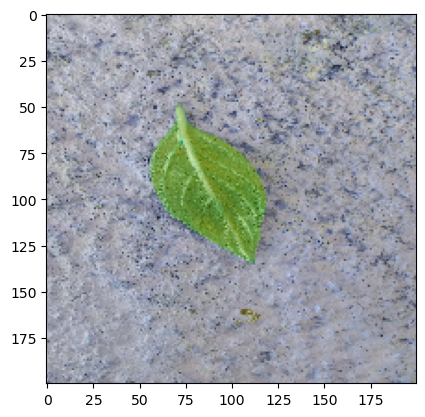

In [98]:
# X = X.astype('float32')
# X /= 255
from keras.utils import to_categorical
Y = to_categorical(y)
print(Y[3])
plt.imshow(X[0])

In [148]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2)
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [141]:
print(X_train.shape)
print(X_test.shape)
print(y_test.shape)
print(y_train.shape)

(288, 200, 200, 3)
(72, 200, 200, 3)
(72, 36)
(288, 36)


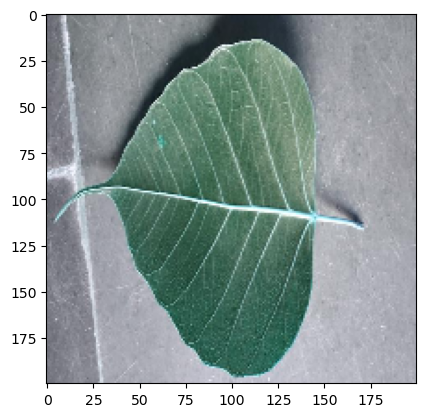

In [143]:
plt.imshow(X_train[0])

In [149]:

model = tf.keras.Sequential([
    Conv2D(32, (3,3), padding='same',activation = 'relu', input_shape=(IMG_SIZE,IMG_SIZE,3)),
    BatchNormalization(),
    MaxPooling2D((2,2)),

    Conv2D(32, (3,3), padding='same',activation = 'relu'),
    BatchNormalization(),
    MaxPooling2D((2,2)),
    Conv2D(32, (3,3), padding='same',activation = 'relu'),
     BatchNormalization(),
    MaxPooling2D((2,2)),
    Conv2D(32, (3,3), padding='same',activation = 'relu'),
    BatchNormalization(),
    MaxPooling2D((2,2)),
    
    Flatten(),
    Dense(128, activation='relu'),
    Dense(36, activation = 'softmax')    
])

In [150]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [154]:
fittedModel = model.fit(X_train, y_train, batch_size=16,shuffle=True, epochs=20, validation_data = (X_test, y_test))

Epoch 1/20
18/18 [==============================] - 7s 390ms/step - loss: 0.0085 - accuracy: 1.0000 - val_loss: 2.8270 - val_accuracy: 0.3472
Epoch 2/20
18/18 [==============================] - 7s 399ms/step - loss: 0.0047 - accuracy: 1.0000 - val_loss: 2.5351 - val_accuracy: 0.4722
Epoch 3/20
18/18 [==============================] - 7s 401ms/step - loss: 0.0025 - accuracy: 1.0000 - val_loss: 2.5045 - val_accuracy: 0.4722
Epoch 4/20
18/18 [==============================] - 7s 404ms/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 2.5009 - val_accuracy: 0.4861
Epoch 5/20
18/18 [==============================] - 7s 400ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 2.5156 - val_accuracy: 0.4583
Epoch 6/20
18/18 [==============================] - 7s 385ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 2.5317 - val_accuracy: 0.4722
Epoch 7/20
18/18 [==============================] - 7s 403ms/step - loss: 9.5033e-04 - accuracy: 1.0000 - val_loss: 2.5451 - val_accuracy: 0.4722
Ep

In [155]:
score = model.evaluate(X_test, y_test)
print("Test Score: ", score[0])
print("Test Accuracy: ", score[1])

3/3 [==============================] - 1s 159ms/step - loss: 2.8167 - accuracy: 0.4444
Test Score:  2.816727876663208
Test Accuracy:  0.4444444477558136


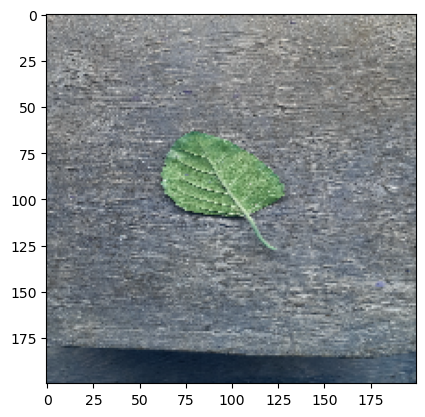

Common Name:  Tulsi
Hindi Name:  Tulsi
Scientific Name:  Ocimum sanctum
Medicinal Properties:  Anti-inflammatory, Antioxidant, Anti-bacterial, Respiratory Health


In [129]:
img = cv2.resize(cv2.imread("E:\\HerbalLens\\tulsi\\tulsi2.jpg"),(IMG_SIZE, IMG_SIZE))
plt.imshow(img)
plt.show()
CATEGORIES = np.array(CATEGORIES)
y_pred = model.predict(img.reshape(1,IMG_SIZE,IMG_SIZE,3), verbose=0)
preds_single = CATEGORIES[np.argmax(y_pred, axis = -1)]
plant = pd.read_csv('plants.csv', on_bad_lines='skip')
plant = plant.drop_duplicates().reset_index(drop=True).set_index('ImagePath')
ans = preds_single[0]
print("Common Name: ",plant.loc[ans]['CommonName'])
print("Hindi Name: ",plant.loc[ans]['HindiName'])
print("Scientific Name: ",plant.loc[ans]['ScientificName'])
print("Medicinal Properties: ",plant.loc[ans]['MedicinalProperties'])

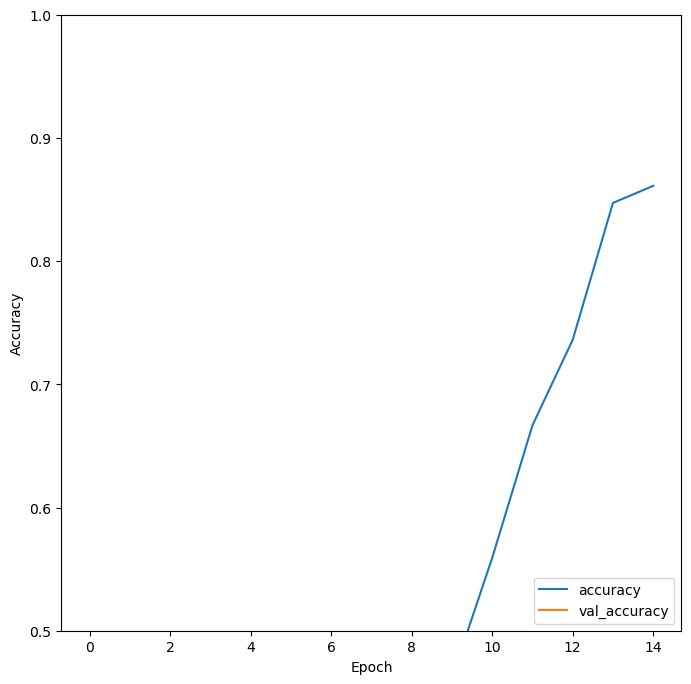

In [130]:
plt.figure(figsize=(8, 8))
plt.plot(fittedModel.history['accuracy'], label='accuracy')
plt.plot(fittedModel.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

plt.savefig("output_report.png")